In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
trainX = np.load("trainX.npy")
trainY = np.load("trainY.npy")
testX = np.load("testX.npy")
testY = np.load("testY.npy")

print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

trainY = tf.keras.utils.to_categorical(trainY, num_classes=20)
testY = tf.keras.utils.to_categorical(testY, num_classes=20)

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
trainX = trainX.reshape(240,112,92,1)
testX = testX.reshape(160,112,92,1)

In [7]:
trainX.shape

(240, 112, 92, 1)

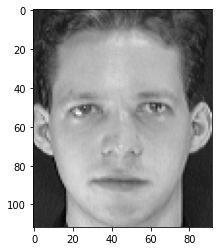

In [9]:
import matplotlib.pyplot as plt

plt.imshow(trainX.reshape(240,112,92)[0],cmap='gray')

In [11]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [34]:
model = models.Sequential()
model.add(layers.Reshape((112,92,1),input_shape=(112,92,1)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(112,92,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(20, activation='softmax'))

In [35]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_1 (Reshape)         (None, 112, 92, 1)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 112, 92, 1)       4         
 hNormalization)                                                 
                                                                 
 conv2d_16 (Conv2D)          (None, 110, 90, 32)       320       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 55, 45, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 53, 43, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 26, 21, 64)      

In [38]:
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=10,
          batch_size=16)

Epoch 1/10
15/15 [==============================] - 5s 318ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 16.7153 - val_accuracy: 0.0500
Epoch 2/10
15/15 [==============================] - 5s 303ms/step - loss: 0.0195 - accuracy: 0.9958 - val_loss: 13.8184 - val_accuracy: 0.0750
Epoch 3/10
15/15 [==============================] - 4s 295ms/step - loss: 0.0362 - accuracy: 0.9875 - val_loss: 1.7198 - val_accuracy: 0.6875
Epoch 4/10
15/15 [==============================] - 5s 306ms/step - loss: 0.0675 - accuracy: 0.9750 - val_loss: 2.0611 - val_accuracy: 0.6500
Epoch 5/10
15/15 [==============================] - 5s 304ms/step - loss: 0.1116 - accuracy: 0.9708 - val_loss: 0.3955 - val_accuracy: 0.8750
Epoch 6/10
15/15 [==============================] - 5s 309ms/step - loss: 0.1280 - accuracy: 0.9542 - val_loss: 2.8155 - val_accuracy: 0.4375
Epoch 7/10
15/15 [==============================] - 5s 307ms/step - loss: 0.0314 - accuracy: 0.9875 - val_loss: 0.8848 - val_accuracy: 0.8188
Epoc